# Assessment 8

## Instructions

1. Import the data located at this link. It has information on people infected with dengue at the district level for 2015 to 2021.
2. Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: Use this code.
3. Use geopandas to plot the number of **cases in 2021 by the district** using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.
4. Use geopandas to plot the number of **cases in 2021 by the province** using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the province level.
5. Use geopandas to plot the number of **cases by the department for all the years** using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level.
6. Use geopandas to plot the number of **cases by the department for all 2021 quarters** using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.

### 0) Installing and importing necessary packages

In [1]:
#pip install geopandas

In [2]:
import os
import pandas as pd
import numpy as np
import csv

import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm

### 1) Import  the data located at this link. It has information on people infected with dengue at the district level for 2015 to 2021.

In [3]:
# Keeps the column "Ubigeo" as string and helps choosing the type of each column
dtypes = {'Ubigeo': str, 'Semana':int, 'Año': int, 'Departamento': str, 'Provincia': str, 'Distrito': str, 'Eventos o daños': str} 

# Imports csv
df = pd.read_csv(r'../../_data/data_dengue_peru.csv', dtype = dtypes)

# Converts the column "Casos" in a int variable
df['Casos'] = df['Casos'].fillna(-9999).astype(str) # the Na´s value converts to "-9999"
df['Casos'] = df['Casos'].str.replace(',', '').astype(float).astype(int)

df.head(5)

C:\Users\U S U A R I O\AppData\Local\Temp\ipykernel_11860\4287509369.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'../../_data/data_dengue_peru.csv', dtype = dtypes)


,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,-9999
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,-9999
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2


In [4]:
# Checking the columns' types
print("Columns' types ")
print(df.dtypes)

print('----------------------------')

# Checking NA's in the df
print("Are there any Na's in the df?")
isna_columns = df.isna().sum()
print(isna_columns)

print('----------------------------')

# Checking the data from "Casos"
print("Total observations for each registration in 'Casos'")
print(df.groupby('Casos').size())

Columns' types 
Año                 int32
Semana              int32
Eventos o daños    object
Departamento       object
Distrito           object
Provincia          object
Ubigeo             object
Casos               int32
dtype: object
----------------------------
Are there any Na's in the df?
Año                0
Semana             0
Eventos o daños    0
Departamento       0
Distrito           0
Provincia          0
Ubigeo             0
Casos              0
dtype: int64
----------------------------
Total observations for each registration in 'Casos'
Casos
-9999      6097
 0       141501
 1         8549
 2         3635
 3         2142
          ...  
 1308         1
 1364         1
 1746         1
 1895         1
 2084         1
Length: 261, dtype: int64


### 2) Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: Use this code.

For exercise 2, we did't use the hint because we import the column "Ubigeo" as a string variable. This simplifies the process for getting the id code for departments (two first Ubigeo's number) and provinces (four first Ubigeo's number). 

This data frame will help to solve exercise 5

In [5]:
# Creating new columns and taking similar names from similar columns in shapefile 
df['CCDD'] = df['Ubigeo'].str[:2] 
df['IDPROV'] = df['Ubigeo'].str[:4]
df = df.rename({'Ubigeo':'UBIGEO'}, axis =1 )

df.head(5)

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,UBIGEO,Casos,CCDD,IDPROV
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2,08,0809
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,-9999,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,-9999,18,1801
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0,08,0809
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2,08,0809


### 3) Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.

#### a) Creating a subdata of dengue cases in 2021


This data frame will help to solve exercises 3, 4 and 6

In [6]:
# Creating subdata for year 2021 only
df_21 = df [ df['Año'] == 2021]

# Replacing -9999 for NaN in the column 'Casos'
df_21['Casos'] = df_21['Casos'].replace(-9999, np.nan).astype(float)

df_21.head(5)

C:\Users\U S U A R I O\AppData\Local\Temp\ipykernel_11860\1163620863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_21['Casos'] = df_21['Casos'].replace(-9999, np.nan).astype(float)


,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,UBIGEO,Casos,CCDD,IDPROV
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
6,2021,41,Dengue,LIMA,INDEPENDENCIA,LIMA,150112,NaN,15,1501
7,2021,41,Dengue,LIMA,VILLA MARIA DEL TRIUNFO,LIMA,150143,NaN,15,1501
8,2021,41,Dengue,LIMA,ATE,LIMA,150103,NaN,15,1501


#### b) Creating an aux subdata for solving exercise 3

In [7]:
# List for keeping columns
aux_colums = ['UBIGEO', 'Departamento', 'Provincia', 'Distrito']

# Collapse by "Ubigeo" and sum column "Casos"
df_21_dist = df_21.groupby(aux_colums)['Casos'].sum()

# Resetting the index for the new df
df_21_dist = df_21_dist.reset_index()

df_21_dist.head(5)

,UBIGEO,Departamento,Provincia,Distrito,Casos
0,010101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,0.0
1,010201,AMAZONAS,BAGUA,BAGUA,474.0
2,010202,AMAZONAS,BAGUA,ARAMANGO,25.0
3,010203,AMAZONAS,BAGUA,COPALLIN,38.0
4,010204,AMAZONAS,BAGUA,EL PARCO,8.0


In [8]:
# Checking NA's in the df
print("Are there any Na's in the df for exercise 3?")
isna_columns = df_21_dist.isna().sum()
print(isna_columns)

Are there any Na's in the df for exercise 3?
UBIGEO          0
Departamento    0
Provincia       0
Distrito        0
Casos           0
dtype: int64


#### c) Importing the shapefile

In [9]:
# Loading the shapefile
shapefile_path = (r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')
maps_dist = gpd.read_file(shapefile_path)

maps_dist.head(5)

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."


In [10]:
# Checking unique values in "UBIGEO" shapefile column
print("The column 'UBIGEO' has only unique values:", maps_dist['UBIGEO'].is_unique)
print("The number of unique values is:" , maps_dist['UBIGEO'].unique().size)

# Select only relevant columns
maps_dist = maps_dist[['UBIGEO', 'geometry']]
maps_dist.head(5)

The column 'UBIGEO' has only unique values: True
The number of unique values is: 1874


,UBIGEO,geometry
0,060504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."


#### d) Merging the necessary data frames for plotting the number of cases in 2021 by the district 

In [11]:
ex_1 = pd.merge(maps_dist, df_21_dist, how="inner", on="UBIGEO")
ex_1

,UBIGEO,geometry,Departamento,Provincia,Distrito,Casos
0,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",LAMBAYEQUE,CHICLAYO,LA VICTORIA,4.0
1,140107,"POLYGON ((-79.66093 -6.90007, -79.65973 -6.900...",LAMBAYEQUE,CHICLAYO,LAGUNAS,0.0
2,140108,"POLYGON ((-79.78014 -6.82123, -79.77781 -6.821...",LAMBAYEQUE,CHICLAYO,MONSEFU,1.0
3,140115,"POLYGON ((-79.58359 -6.77662, -79.58181 -6.777...",LAMBAYEQUE,CHICLAYO,SAÑA,0.0
4,140116,"POLYGON ((-79.44482 -6.82277, -79.44371 -6.823...",LAMBAYEQUE,CHICLAYO,CAYALTI,1.0
...,...,...,...,...,...,...
464,250106,"POLYGON ((-75.02339 -7.95777, -75.01596 -7.965...",UCAYALI,CORONEL PORTILLO,NUEVA REQUENA,18.0
465,010707,"POLYGON ((-78.47479 -5.93642, -78.47356 -5.937...",AMAZONAS,UTCUBAMBA,YAMON,0.0
466,010705,"POLYGON ((-78.29526 -5.81005, -78.29476 -5.810...",AMAZONAS,UTCUBAMBA,JAMALCA,15.0
467,010203,"POLYGON ((-78.32548 -5.56151, -78.32598 -5.562...",AMAZONAS,BAGUA,COPALLIN,38.0


#### e) Plotting Dengue infections in 2021 at distric level

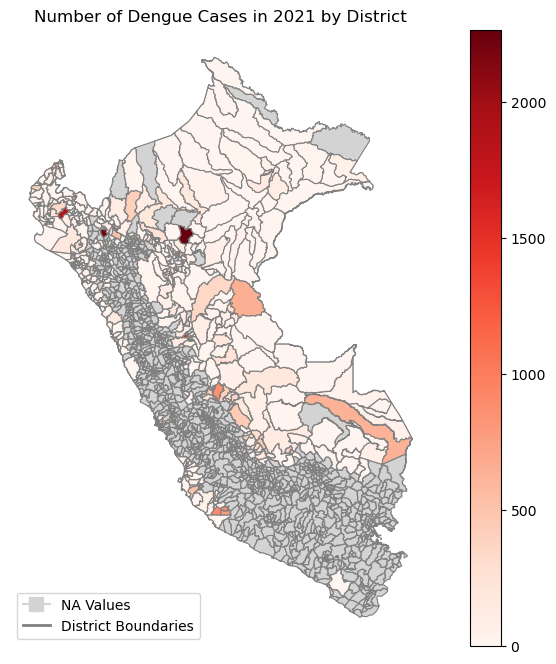

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

maps_dist.plot(ax=ax,color ='lightgrey',
          linewidth=0.8,
          linestyle='-',
          edgecolor='gray',
          legend = True)

ex_1.plot( column='Casos', cmap='Reds', 
          linewidth=0.8, 
          ax=ax,
          linestyle='-',
          edgecolor='gray',
          legend = True)

# Aggregates the title of the map
ax.set_title('Number of Dengue Cases in 2021 by District')
ax.set_axis_off()

# Create a combined legend
handles, labels = ax.get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='lightgrey', marker='s', markersize=10))
labels.append('NA Values')
handles.append(plt.Line2D([0], [0], color='gray', lw=2))
labels.append('District Boundaries')

ax.legend(handles, labels, loc='lower left')

### 4. Use geopandas to plot the number of cases in 2021 by the province using a continuous legend. Do not forget to indicate the color of NA values. For this task, you will have to aggregate shapefiles at the province level.

In [13]:
# Loading the shapefile of distric again
shapefile_path = (r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')
maps_prov = gpd.read_file(shapefile_path)

maps_prov.head(5)

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."


In [14]:
# We aggregate shapefiles at the province level
maps_province = maps_prov.dissolve( by = 'IDPROV', as_index=False )
maps_province

,IDPROV,geometry,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO
0,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",01,AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
1,0102,"POLYGON ((-78.32620 -5.56382, -78.32625 -5.565...",01,AMAZONAS,02,BAGUA,04,EL PARCO,EL PARCO,010204,010204,9,EL PARCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
2,0103,"POLYGON ((-77.93780 -6.03777, -77.93781 -6.037...",01,AMAZONAS,03,BONGARA,11,VALERA,VALERA (SAN PABLO),010311,010311,16,VALERA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
3,0104,"POLYGON ((-77.58527 -4.47289, -77.58594 -4.475...",01,AMAZONAS,04,CONDORCANQUI,01,NIEVA,SANTA MARIA DE NIEVA,010401,010401,131,NIEVA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
4,0105,"POLYGON ((-77.93702 -6.69093, -77.93914 -6.693...",01,AMAZONAS,05,LUYA,17,SAN FRANCISCO DEL YESO,SAN FRANCISCO DEL YESO,010517,010517,22,SAN FRANCISCO DEL YESO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2403,"POLYGON ((-80.19606 -3.61959, -80.19610 -3.620...",24,TUMBES,03,ZARUMILLA,01,ZARUMILLA,ZARUMILLA,240301,240301,3,ZARUMILLA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
192,2501,"POLYGON ((-73.27613 -9.68486, -73.27596 -9.685...",25,UCAYALI,01,CORONEL PORTILLO,03,IPARIA,IPARIA,250103,250103,67,IPARIA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
193,2502,"POLYGON ((-72.18238 -11.01266, -72.18112 -11.0...",25,UCAYALI,02,ATALAYA,02,SEPAHUA,SEPAHUA,250202,250202,48,SEPAHUA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
194,2503,"POLYGON ((-75.11866 -8.90145, -75.11869 -8.902...",25,UCAYALI,03,PADRE ABAD,01,PADRE ABAD,AGUAYTIA,250301,250301,105,PADRE ABAD,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com


In [15]:
# Checking unique values in "IDPROV" shapefile column
print("The column 'IDPROV' has only unique values:", maps_province['IDPROV'].is_unique)
print("The number of unique values is:" , maps_province['IDPROV'].unique().size)

The column 'IDPROV' has only unique values: True
The number of unique values is: 196


In [16]:
# List for keeping columns that we will use
aux_colums = ['IDPROV', 'Provincia']

# Collapse by "IDPROV" and sum column "Casos"
df_21_prov = df_21.groupby(aux_colums)['Casos'].sum()

# Resetting the index for the new df
df_21_prov = df_21_prov.reset_index()

df_21_prov

,IDPROV,Provincia,Casos
0,0101,CHACHAPOYAS,0.0
1,0102,BAGUA,676.0
2,0103,BONGARA,0.0
3,0104,CONDORCANQUI,435.0
4,0107,UTCUBAMBA,719.0
...,...,...,...
87,2403,ZARUMILLA,72.0
88,2501,CORONEL PORTILLO,1241.0
89,2502,ATALAYA,179.0
90,2503,PADRE ABAD,193.0


In [17]:
# We merge the df of the shapefiles with the df of dengue cases to plot the number of cases in 2021 by province on a map
dengue_province = pd.merge(maps_province, df_21_prov, how="inner", on="IDPROV")
dengue_province

,IDPROV,geometry,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,Provincia,Casos
0,0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",01,AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,CHACHAPOYAS,0.0
1,0102,"POLYGON ((-78.32620 -5.56382, -78.32625 -5.565...",01,AMAZONAS,02,BAGUA,04,EL PARCO,EL PARCO,010204,010204,9,EL PARCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,BAGUA,676.0
2,0103,"POLYGON ((-77.93780 -6.03777, -77.93781 -6.037...",01,AMAZONAS,03,BONGARA,11,VALERA,VALERA (SAN PABLO),010311,010311,16,VALERA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,BONGARA,0.0
3,0104,"POLYGON ((-77.58527 -4.47289, -77.58594 -4.475...",01,AMAZONAS,04,CONDORCANQUI,01,NIEVA,SANTA MARIA DE NIEVA,010401,010401,131,NIEVA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,CONDORCANQUI,435.0
4,0107,"POLYGON ((-78.13517 -5.89454, -78.13515 -5.894...",01,AMAZONAS,07,UTCUBAMBA,03,CUMBA,CUMBA,010703,010703,72,CUMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,UTCUBAMBA,719.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2403,"POLYGON ((-80.19606 -3.61959, -80.19610 -3.620...",24,TUMBES,03,ZARUMILLA,01,ZARUMILLA,ZARUMILLA,240301,240301,3,ZARUMILLA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,ZARUMILLA,72.0
88,2501,"POLYGON ((-73.27613 -9.68486, -73.27596 -9.685...",25,UCAYALI,01,CORONEL PORTILLO,03,IPARIA,IPARIA,250103,250103,67,IPARIA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,CORONEL PORTILLO,1241.0
89,2502,"POLYGON ((-72.18238 -11.01266, -72.18112 -11.0...",25,UCAYALI,02,ATALAYA,02,SEPAHUA,SEPAHUA,250202,250202,48,SEPAHUA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,ATALAYA,179.0
90,2503,"POLYGON ((-75.11866 -8.90145, -75.11869 -8.902...",25,UCAYALI,03,PADRE ABAD,01,PADRE ABAD,AGUAYTIA,250301,250301,105,PADRE ABAD,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,PADRE ABAD,193.0


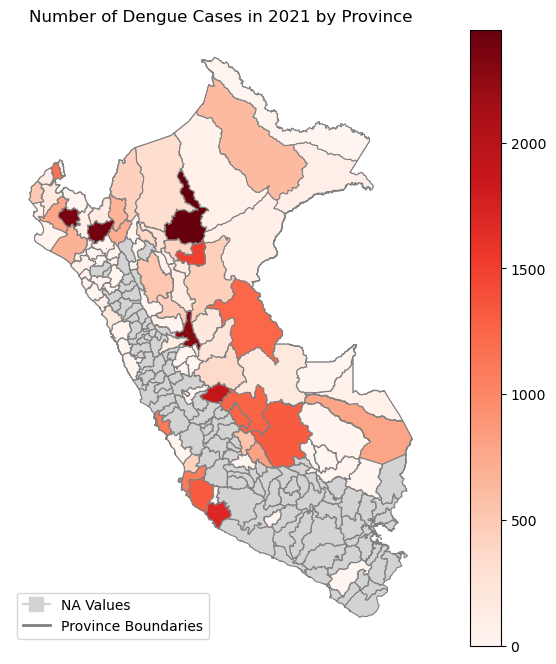

In [18]:
# Plotting Dengue infections in 2021 at province level
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

maps_province.plot(ax=ax,color ='lightgrey',
          linewidth=0.8,
          linestyle='-',
          edgecolor='gray',
          legend = True)

dengue_province.plot( column='Casos', cmap='Reds', 
          linewidth=0.8, 
          ax=ax,
          linestyle='-',
          edgecolor='gray',
          legend = True)

# Aggregates the title of the map
ax.set_title('Number of Dengue Cases in 2021 by Province')
ax.set_axis_off()

# Create a combined legend
handles, labels = ax.get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='lightgrey', marker='s', markersize=10))
labels.append('NA Values')
handles.append(plt.Line2D([0], [0], color='gray', lw=2))
labels.append('Province Boundaries')

ax.legend(handles, labels, loc='lower left')

### 6) Use geopandas to plot the number of **cases by the department for all 2021 quarters** using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.

In [19]:
# grouping data by department and quarter
df_21['Quarter'] = pd.cut(df_21['Semana'], bins=[1, 14, 27, 40, 53], labels=['Q1', 'Q2', 'Q3', 'Q4'])
df_21_dept_quarter = df_21.groupby(['Departamento', 'Quarter'])['Casos'].sum().reset_index()
df_21_dept_quarter.head(10)

C:\Users\U S U A R I O\AppData\Local\Temp\ipykernel_11860\3739334635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_21['Quarter'] = pd.cut(df_21['Semana'], bins=[1, 14, 27, 40, 53], labels=['Q1', 'Q2', 'Q3', 'Q4'])


,Departamento,Quarter,Casos
0,AMAZONAS,Q1,530.0
1,AMAZONAS,Q2,660.0
2,AMAZONAS,Q3,562.0
3,AMAZONAS,Q4,0.0
4,ANCASH,Q1,3.0
5,ANCASH,Q2,22.0
6,ANCASH,Q3,1.0
7,ANCASH,Q4,0.0
8,AYACUCHO,Q1,768.0
9,AYACUCHO,Q2,337.0


In [20]:
# We aggregate shapefiles at the department level
maps_department = maps_province.dissolve(by='CCDD', as_index=False)
maps_department

,CCDD,geometry,IDPROV,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO
0,01,"POLYGON ((-77.78625 -6.94929, -77.78681 -6.951...",0101,AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
1,02,"POLYGON ((-77.70012 -10.32263, -77.70189 -10.3...",0201,ANCASH,01,HUARAZ,05,INDEPENDENCIA,CENTENARIO,020105,020105,136,INDEPENDENCIA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
2,03,"POLYGON ((-72.35713 -14.43812, -72.35740 -14.4...",0301,APURIMAC,01,ABANCAY,08,SAN PEDRO DE CACHORA,CACHORA,030108,030108,52,SAN PEDRO DE CACHORA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
3,04,"POLYGON ((-71.32410 -17.06147, -71.32365 -17.0...",0401,AREQUIPA,01,AREQUIPA,15,QUEQUEÑA,QUEQUEÑA,040115,040115,6,QUEQUEÑA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
4,05,"POLYGON ((-74.50249 -15.16092, -74.50336 -15.1...",0501,AYACUCHO,01,HUAMANGA,16,ANDRES AVELINO CACERES DORREGARAY,JARDIN,050116,050116,10,ANDRES AVELINO CACERES DORREGARAY,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
5,06,"POLYGON ((-78.81352 -7.42584, -78.81432 -7.425...",0601,CAJAMARCA,01,CAJAMARCA,01,CAJAMARCA,CAJAMARCA,060101,060101,126,CAJAMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
6,07,"POLYGON ((-77.10456 -12.06373, -77.10449 -12.0...",0701,CALLAO,01,CALLAO,07,MI PERU,MI PERU,070107,070107,1,MI PERU,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
7,08,"POLYGON ((-71.89418 -14.78954, -71.89579 -14.7...",0801,CUSCO,01,CUSCO,08,WANCHAQ,WANCHAQ,080108,080108,1,WANCHAQ,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
8,09,"POLYGON ((-75.25853 -14.04317, -75.26012 -14.0...",0901,HUANCAVELICA,01,HUANCAVELICA,06,HUACHOCOLPA,HUACHOCOLPA,090106,090106,70,HUACHOCOLPA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
9,10,"POLYGON ((-76.49368 -10.31116, -76.49334 -10.3...",1001,HUANUCO,01,HUANUCO,13,SAN PABLO DE PILLAO,SAN PABLO DE PILLAO,100113,100113,57,SAN PABLO DE PILLAO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com


In [21]:
# Checking unique values in "CCDD" shapefile column
print("The column 'CCDD' has only unique values:", maps_department['CCDD'].is_unique)
print("The number of unique values is:" , maps_department['CCDD'].unique().size)

The column 'CCDD' has only unique values: True
The number of unique values is: 25


In [22]:
# Shapefile Preparation
maps_dept = maps_department[['CCDD', 'NOMBDEP', 'geometry']]
# Change the name of NOMBDEP column to Departamento
maps_dept = maps_dept.rename(columns={'NOMBDEP': 'Departamento'})
maps_dept .head(5)

,CCDD,Departamento,geometry
0,01,AMAZONAS,"POLYGON ((-77.78625 -6.94929, -77.78681 -6.951..."
1,02,ANCASH,"POLYGON ((-77.70012 -10.32263, -77.70189 -10.3..."
2,03,APURIMAC,"POLYGON ((-72.35713 -14.43812, -72.35740 -14.4..."
3,04,AREQUIPA,"POLYGON ((-71.32410 -17.06147, -71.32365 -17.0..."
4,05,AYACUCHO,"POLYGON ((-74.50249 -15.16092, -74.50336 -15.1..."


In [23]:
# Data Combination
ex_4 = pd.merge(maps_dept, df_21_dept_quarter, how="inner", on="Departamento")
ex_4.head(10)

,CCDD,Departamento,geometry,Quarter,Casos
0,01,AMAZONAS,"POLYGON ((-77.78625 -6.94929, -77.78681 -6.951...",Q1,530.0
1,01,AMAZONAS,"POLYGON ((-77.78625 -6.94929, -77.78681 -6.951...",Q2,660.0
2,01,AMAZONAS,"POLYGON ((-77.78625 -6.94929, -77.78681 -6.951...",Q3,562.0
3,01,AMAZONAS,"POLYGON ((-77.78625 -6.94929, -77.78681 -6.951...",Q4,0.0
4,02,ANCASH,"POLYGON ((-77.70012 -10.32263, -77.70189 -10.3...",Q1,3.0
5,02,ANCASH,"POLYGON ((-77.70012 -10.32263, -77.70189 -10.3...",Q2,22.0
6,02,ANCASH,"POLYGON ((-77.70012 -10.32263, -77.70189 -10.3...",Q3,1.0
7,02,ANCASH,"POLYGON ((-77.70012 -10.32263, -77.70189 -10.3...",Q4,0.0
8,05,AYACUCHO,"POLYGON ((-74.50249 -15.16092, -74.50336 -15.1...",Q1,768.0
9,05,AYACUCHO,"POLYGON ((-74.50249 -15.16092, -74.50336 -15.1...",Q2,337.0


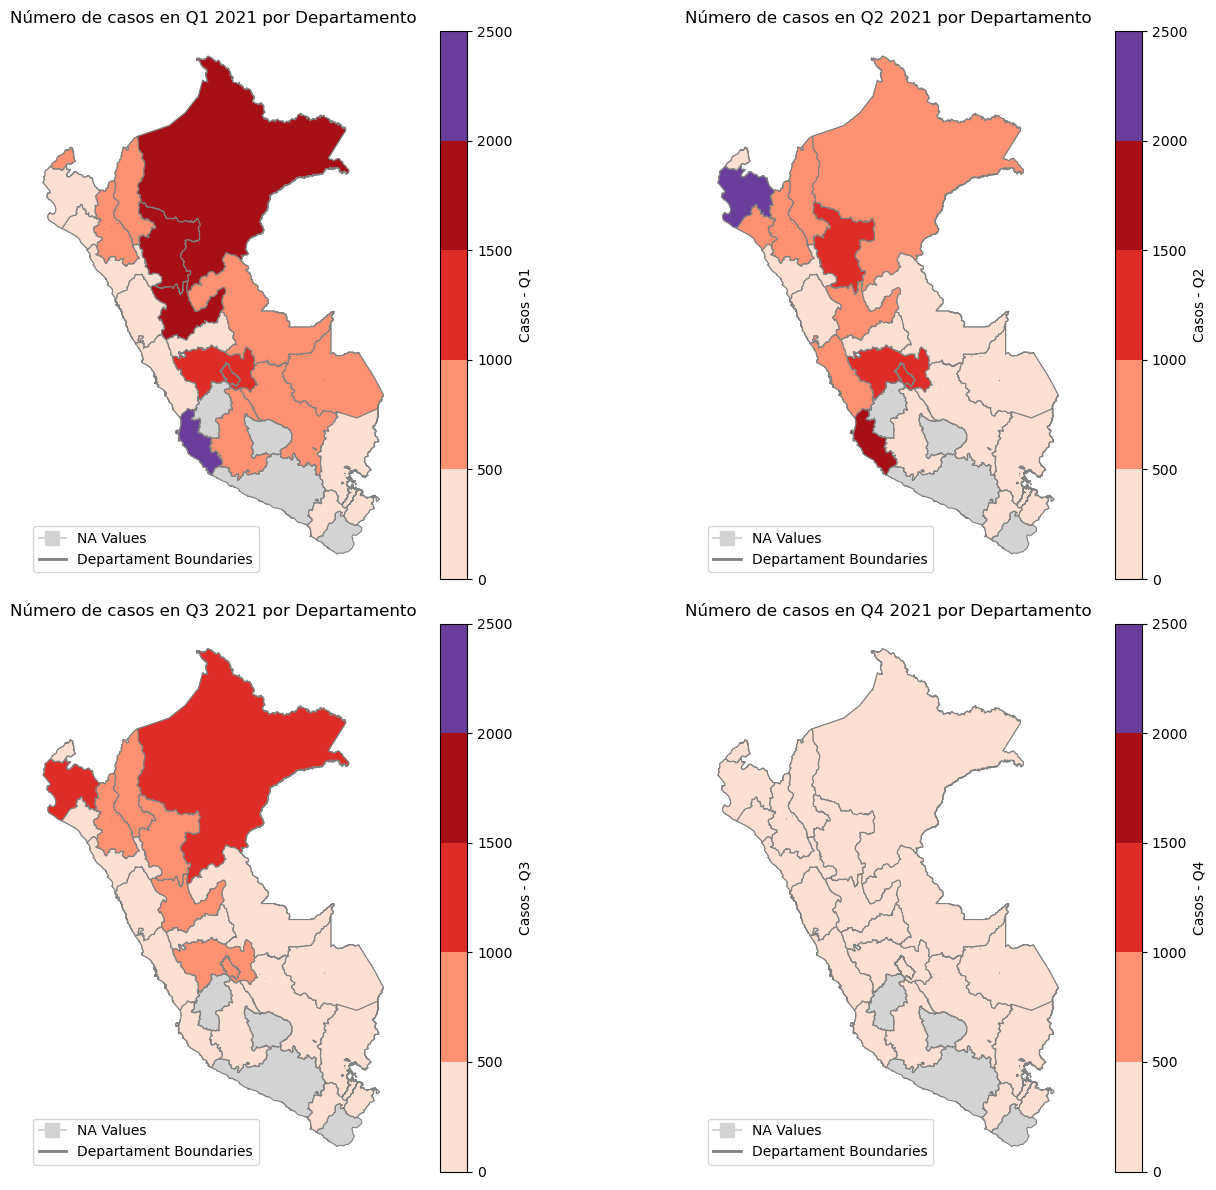

In [24]:
# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12), subplot_kw={'aspect': 'equal'})
quarters = ['Q1', 'Q2', 'Q3', 'Q4']

for i, quarter in enumerate(quarters):
    ax = axs.flatten()[i]

    # Plot the map of Peru by department
    maps_dept.plot(ax=ax, color='lightgrey', linewidth=0.8, linestyle='-', edgecolor='gray', legend=True)

    # Filter data for the current quarter
    ex_4_quarter = ex_4[ex_4['Quarter'] == quarter]

    # Plot map for current quarter with categorical legend
    cmap = ListedColormap(['#fee0d2', '#fc9272', '#de2d26', '#a50f15', '#6a3d9a'])
    bounds = [0, 500, 1000, 1500, 2000, 2500]
    norm = BoundaryNorm(bounds, cmap.N)

    ex_4_quarter.plot(column='Casos', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='grey', legend=True, legend_kwds={'label': f'Casos - {quarter}'}, norm=norm)

    # Axis and Title Settings
    ax.set_title(f'Número de casos en {quarter} 2021 por Departamento')
    ax.set_axis_off()

    # Add legend for values NaN
    handles, labels = ax.get_legend_handles_labels()
    handles.append(plt.Line2D([0], [0], color='lightgrey', marker='s', markersize=10))
    labels.append('NA Values')
    handles.append(plt.Line2D([0], [0], color='gray', lw=2))
    labels.append('Departament Boundaries')

    ax.legend(handles, labels, loc='lower left')

# Adjust the layout and display the graph
plt.tight_layout()
plt.show()